# HW 1: Perceptron

Note: you can add text written in Markdown to this notebook to explain your work and your conclusions. In local Jupyter, add a new cell by using the "+" button on the toolbar), and set it to be a markdown cell (by toggling the "Code" dropdown on the toolbar to say "Markdown" instead). In Colab, use the +Text button on the toolbar.

For examples of how to use Markdown, look at the examples in this notebook, or [this cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet).

In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
# make the code reproducible 
np.random.seed(3)

## Generate Data

In [3]:
n = 50
d = 2
feature_dict = {'feature 1': randn(n),
                'feature 2': randn(n),
                'offset':    np.ones(n)}
X = pd.DataFrame(data=feature_dict)
w_true = pd.Series(randn(d+1), index=X.columns)
y = np.sign(X.dot(w_true))

In [25]:
w_true

feature 1    0.874286
feature 2   -1.293537
offset      -0.079741
dtype: float64

## Visualize Data

In [41]:
def plot_perceptron(X,y,w,plot_classification_boundary=True):
    for index, row in X.iterrows():
        if y[index] > 0:
            plt.scatter(row[0],row[1],color='blue',marker='s',label="y=1")
        else: 
            plt.scatter(row[0],row[1],color='red',marker='o',label="y=-1")

    plt.xlim(-4,4)
    plt.ylim(-4,4)

    if plot_classification_boundary:
        x1samples = np.arange(np.min(X['feature 1']),np.max(X['feature 1']),0.1)
        plt.plot(x1samples, [-(w[0]*x1 + w[2])/w[1] for x1 in x1samples],color='black',label='classification boundary')
    plt.show()

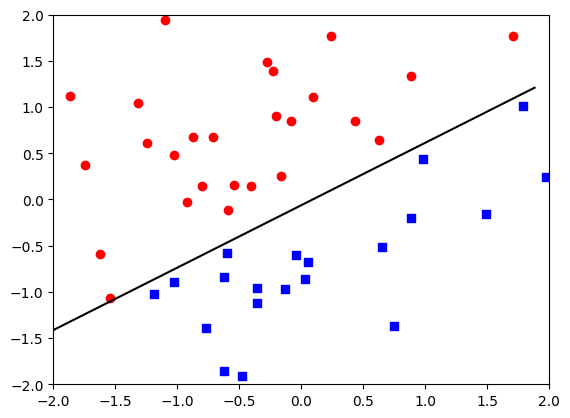

In [5]:
plot_perceptron(X,y,w_true)

## a) Code the missing parts of the Perceptron algorithm

Inputs to Perceptron are:

required arguments: <br>
X = data points <br>
Y = true values <br>

optional arguments: <br>
maxchecks = maximum number of data points to look out, which may or may not violate the perceptron condition (default: 1000) <br>
maxiters = maximum number of updates to w (default: 100) <br>
w_0 = initial guess of w (default: random) <br>

Perceptron should start with the input guess of w, look at most maxchecks data points and make at most maxiters updates, and return the final w.

In [18]:
X[['feature 1', 'feature 2']].to_numpy()

array([[ 1.78862847,  1.01318344],
       [ 0.43650985,  0.85279784],
       [ 0.09649747,  1.1081875 ],
       [-1.8634927 ,  1.11939066],
       [-0.2773882 ,  1.48754313],
       [-0.35475898, -1.11830068],
       [-0.08274148,  0.84583341],
       [-0.62700068, -1.86088953],
       [-0.04381817, -0.6028851 ],
       [-0.47721803, -1.91447204],
       [-1.31386475,  1.04814751],
       [ 0.88462238,  1.33373782],
       [ 0.88131804, -0.19741468],
       [ 1.70957306,  1.77464503],
       [ 0.05003364, -0.67472751],
       [-0.40467741,  0.15061687],
       [-0.54535995,  0.1529457 ],
       [-1.54647732, -1.06419527],
       [ 0.98236743,  0.43794661],
       [-1.10106763,  1.93897846],
       [-1.18504653, -1.02493087],
       [-0.2056499 ,  0.89933845],
       [ 1.48614836, -0.15450685],
       [ 0.23671627,  1.7696273 ],
       [-1.02378514,  0.48378835],
       [-0.7129932 ,  0.6762164 ],
       [ 0.62524497,  0.64316328],
       [-0.16051336,  0.24908671],
       [-0.76883635,

In [23]:
# Python does not allow the argument of a function to depend on another argument, 
# so we bypass the issue by setting w_0 = None and assigning it immediately in the function
def perceptron(X=X,y=y,w_0=None,maxchecks=1000,maxiters=100): 
    if w_0 is None:
        w_0=randn(X.shape[1])
    w = w_0
    ### ENTER YOUR CODE HERE
    check_count = 0
    for iter in range(maxiters):
        for point, label in zip(X, y):
            prediction = np.dot(w, point)
            agreement = prediction * label
            mistake = agreement <= 0
            if mistake:
                update = label * point
                w += update
                check_count += 1
            if check_count > maxchecks:
                break
    return w

## b) Run perceptron on the above linearly separable data set

In [27]:
w = perceptron(X.to_numpy(),y)
w

array([ 1.60494758, -2.2434307 , -0.1680901 ])

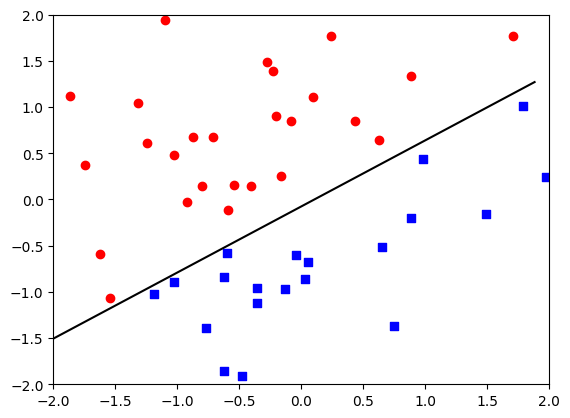

In [29]:
plot_perceptron(X,y,w)

## c) Run perceptron on data sets of size n = 20, 100, and 1000

## For n = 20

In [30]:
n = 20
d = 2
feature_dict = {'feature 1': randn(n),
                'feature 2': randn(n),
                'offset':    np.ones(n)}
X = pd.DataFrame(data=feature_dict)
w_true = pd.Series(randn(d+1), index=X.columns)
y = np.sign(X.dot(w_true))

In [31]:
w_20 = perceptron(X.to_numpy(),y)
w_20

array([-2.71900807, -1.90417221, -2.23563662])

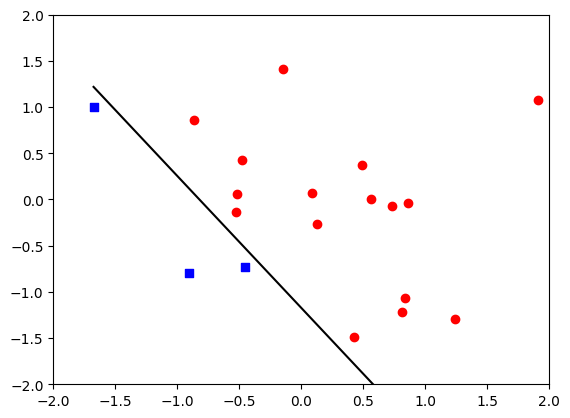

In [32]:
plot_perceptron(X,y,w_20)

## For n = 100

In [44]:
n = 100
d = 2
feature_dict = {'feature 1': randn(n),
                'feature 2': randn(n),
                'offset':    np.ones(n)}
X = pd.DataFrame(data=feature_dict)
w_true = pd.Series(randn(d+1), index=X.columns)
y = np.sign(X.dot(w_true))

In [45]:
w_100 = perceptron(X.to_numpy(),y)
w_100

array([-4.95001656, -4.99214931,  2.247167  ])

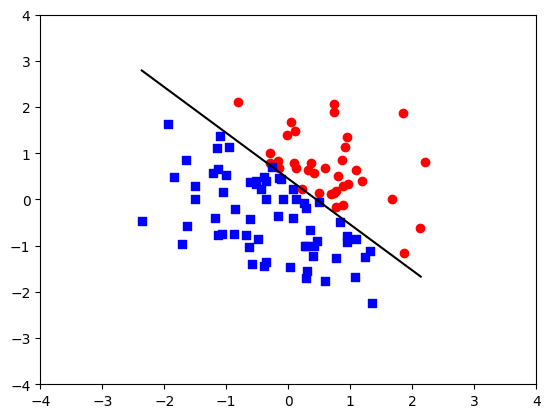

In [46]:
plot_perceptron(X,y,w_100)

## For n = 1000

In [72]:
n = 1000
d = 2
feature_dict = {'feature 1': randn(n),
                'feature 2': randn(n),
                'offset':    np.ones(n)}
X = pd.DataFrame(data=feature_dict)
w_true = pd.Series(randn(d+1), index=X.columns)
y = np.sign(X.dot(w_true))

In [73]:
w_1000 = perceptron(X.to_numpy(),y)
w_1000

array([-21.6051552 ,  -7.97718473,  -7.36364638])

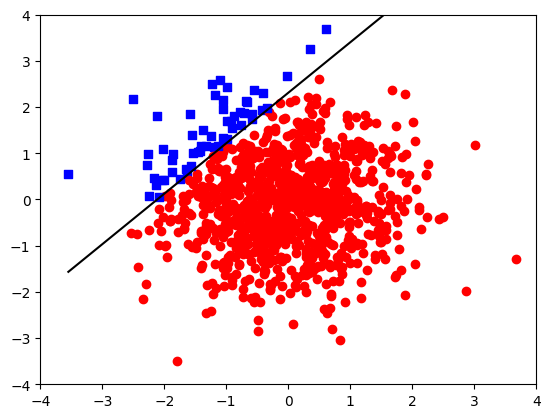

In [49]:
plot_perceptron(X,y,w_1000)

In [50]:
print(np.min(X['feature 1']), np.max(X['feature 1']))

-3.5462993469993016 4.091392759573651


## d) Run perceptron on data set of size n=1000 with dimension d=10

In [75]:
n = 1000
d = 10
feature_dict = {}
for i in range(1, 11):
    feature_dict[f'feature {i}'] = randn(n)
feature_dict['offset'] = np.ones(n)
X = pd.DataFrame(data=feature_dict)
# print(X)
w_true = pd.Series(randn(d+1), index=X.columns)
y = np.sign(X.dot(w_true))

In [76]:
w_1000_10 = perceptron(X.to_numpy(),y)
w_1000_10

array([ 10.3295039 ,   2.73876613,  53.8909688 ,  -4.10269996,
        32.34599526, -10.91758301, -24.56059301, -11.35204   ,
        24.42682948,   0.17103288,  14.27162644])

## e) Run perceptron on dataset from (d) 100 times

Plot a histogram for the number of updates that the algorithm takes to converge. By convergence, we mean the distance between the normalized weight vectors is smaller than some small $\epsilon>0$. For purposes of this problem, choose $\epsilon = 0.1$.

For this portion, make sure your perceptron implementation picks the next consideration point randomly instead of deterministically.

In [146]:
### STUDENT
# Create a helper function that computes the euclidean distance between normalized versions of vectors x,y
def distance(x,y):
    ### ENTER YOUR CODE HERE
    x_norm = x / np.linalg.norm(x)
    y_norm = y / np.linalg.norm(y)
    dist = np.linalg.norm(x_norm-y_norm)
    return dist

In [183]:
### STUDENT 
def perceptron_e(X=X,y=y,w_0=None,epsilon=0.1,w_true=w_true):
    if w_0 is None:
        w_0 = randn(X.shape[1])
    ### ENTER YOUR CODE HERE
    max_checks = 10000
    n = X.shape[0]
    steps = []
    distances = []
    ws = []
    for _ in range(100):
        w = w_0.copy()
        check = 0
        dist = 10
        while check < max_checks:
            i = np.random.randint(n)
            point, label = X[i], y[i]
            prediction = np.dot(w, point)
            agreement = prediction * label
            mistake = agreement <= 0

            if mistake:
                update = label * point
                w += update
                check += 1
                dist = distance(w, w_true)
                if dist < epsilon:
                    break
        steps.append(check)
        distances.append(dist)
        ws.append(w)
        print(f'Round {_}, takes {check} updates to converge.')
    return ws, steps, distances

In [187]:
n = 1000
d = 10
feature_dict = {}
for i in range(1, d+1):
    feature_dict[f'feature {i}'] = randn(n)
feature_dict['offset'] = np.ones(n)
X = pd.DataFrame(data=feature_dict)
# print(X)
w_true = pd.Series(randn(d+1), index=X.columns)
y = np.sign(X.dot(w_true))

In [188]:
w_out, num_steps, distances = perceptron_e(X.to_numpy(), y, w_true=w_true)

Round 0, takes 142 updates to converge.
Round 1, takes 145 updates to converge.
Round 2, takes 154 updates to converge.
Round 3, takes 172 updates to converge.
Round 4, takes 184 updates to converge.
Round 5, takes 165 updates to converge.
Round 6, takes 116 updates to converge.
Round 7, takes 166 updates to converge.
Round 8, takes 107 updates to converge.
Round 9, takes 111 updates to converge.
Round 10, takes 126 updates to converge.
Round 11, takes 81 updates to converge.
Round 12, takes 117 updates to converge.
Round 13, takes 59 updates to converge.
Round 14, takes 82 updates to converge.
Round 15, takes 100 updates to converge.
Round 16, takes 150 updates to converge.
Round 17, takes 96 updates to converge.
Round 18, takes 164 updates to converge.
Round 19, takes 108 updates to converge.
Round 20, takes 143 updates to converge.
Round 21, takes 94 updates to converge.
Round 22, takes 112 updates to converge.
Round 23, takes 113 updates to converge.
Round 24, takes 62 updates to c

100


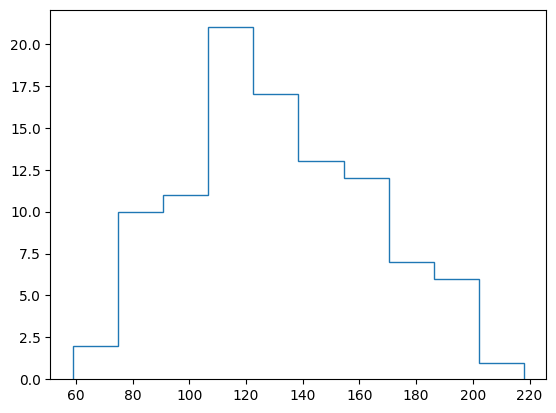

In [189]:
print(len(num_steps))
counts, bins = np.histogram(num_steps)
plt.stairs(counts, bins)

## f)  Summarize your conclusions with respect to accuracy and running time as a function of n (size of data set) and d (dimension). 

For this part, assume the data is not linearly separable and given a 1-2 sentence qualitative response for all 4 cases (accuracy/running time vs $n$/$d$). (If your perceptron always converges, then the accuracy will be perfect; if you stop before convergence, eg because it's taking too long to run, your accuracy will be less than perfect.)

**RESPONSE: **
We can use the euclidean distance between perceptron outcome and the true_w to assess the accuracy of the algorithm. accuracy and runtime has linear relationship with $n$. The runtime grow linearly as $d$ increases, and the accuracy remains the same.

## g) Run the perceptron from part (a) on the dataset with an outlier given below. What happens?

In [131]:
# (re)generate data with same random seed, adding one outlier
np.random.seed(3)

n = 50
d = 2
feature_dict = {'feature 1': randn(n),
                'feature 2': randn(n),
                'offset':    np.ones(n)}
X = pd.DataFrame(data=feature_dict)
w_true = pd.Series(randn(d+1), index=X.columns)
y = np.sign(X.dot(w_true))

y[0] = -y[0]

In [132]:
w_outlier = perceptron(X.to_numpy(),y)
w_outlier

array([ 4.88353503, -7.85495868, -0.85101361])

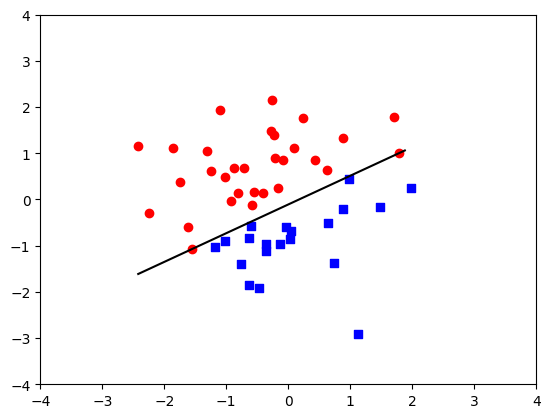

In [133]:
plot_perceptron(X,y,w_outlier)

**ANSWER:**
Perceptron cannot successfully generate hyperplane that splits the two sets of data. In other words, when there is an outlier, perceptron cannot distinguish that and converge to the correct decision boundary.

## h) Try out one idea to fix perceptron
Ideas to get started:
* how could you identify points that are persistently misclassified, or points whose updates cause many other points to become misclassified?
* could you remember good models you saw along the way, even if the final model is bad?